# Question 1


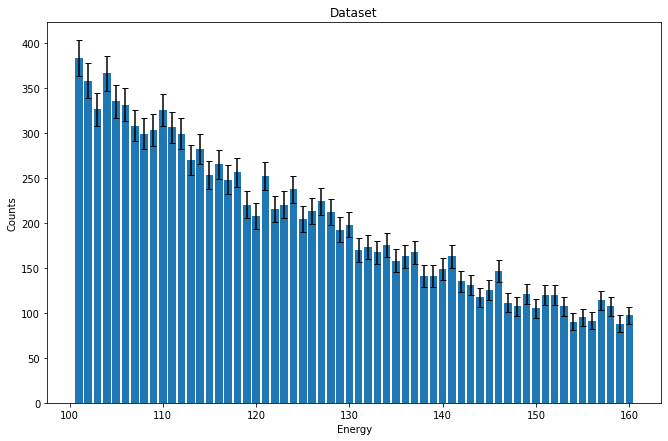

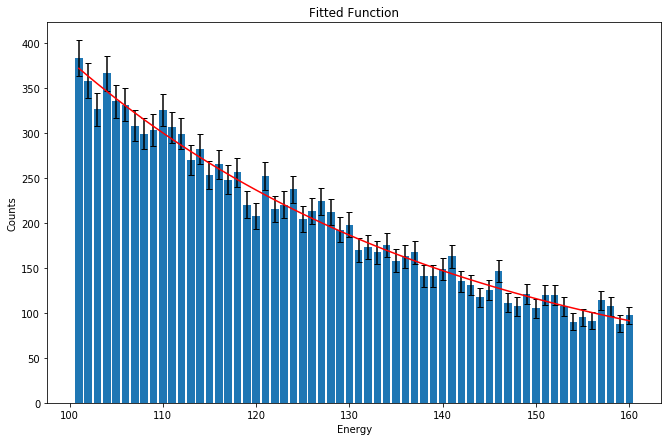

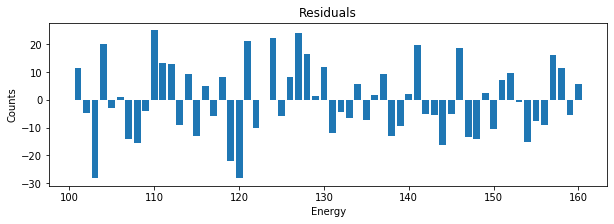

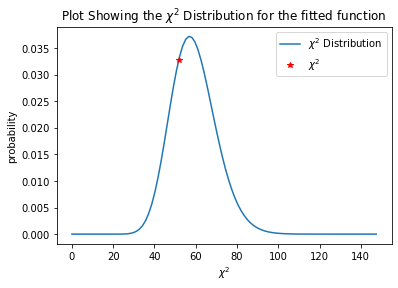

In [56]:
from prettytable import PrettyTable
import scipy.optimize as optimize
%matplotlib inline
from scipy.io import loadmat
from scipy.stats import chisquare, chi2
import matplotlib.pyplot as plt
import math
import numpy as np

e=n=0
W = loadmat('ATLAS_DATA1.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['e', 'n']})

# PLOT DATASET
figure = plt.figure(figsize=(11,7))
n_error = np.sqrt(n)
plt.bar(e,n, yerr=n_error, capsize=3)
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Dataset")
plt.show()

# FIRST GUESSES
a = 1000
b = -0.01

def fitted_function(e,a,b):
    return a*np.exp(b*e)

params, params_covariance = optimize.curve_fit(fitted_function,e,n,p0=[a,b])
n_fitted = fitted_function(e,params[0],params[1])

# PLOT FITTED FUNCTION
figure = plt.figure(figsize=(11,7))
n_error = np.sqrt(n)
plt.bar(e,n, yerr=n_error, capsize=3)
plt.plot(e,n_fitted, "r")
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Fitted Function")
plt.show()

residual = n-n_fitted

# PLOT RESIDUALS
figure = plt.figure(figsize=(10,3))
plt.bar(e,residual)
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Residuals")
plt.show()


chi = chisquare(n,n_fitted)
reduced_chi2 = chi[0]/(len(n)-1)

def plotChiDist(chi,dof):
    # Plot graphs.
    x = np.linspace(0,2.5*dof,100)
        
    # Pdf calcs
    CDF = chi2.pdf(x,dof)           # Curve
    y_chi2 = chi2.pdf(chi,dof)      # Sample Chi^2
    
    # Plot curve and points
    plt.plot(x,CDF, label="$\chi^2$ Distribution")
    plt.plot(chi,y_chi2,'r*', label="$\chi^2$" )
    plt.title("Plot Showing the $\chi^2$ Distribution for the fitted function")
    
    plt.xlabel('$\chi^2$')
    plt.ylabel("probability")
    plt.legend()
    plt.show()

plotChiDist(chi[0],len(n)-1)

